<a href="https://colab.research.google.com/github/RachelRamirez/FashionMNIST_DataAugmentation/blob/main/fashion_mnist_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Simple MNIST convnet" Architecture with Extremely Limited Data used to Train CNN

**Original Author as applied to MNIST (Numbers):** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Applied to Fashion MNIST** 2021/08/25

**Description:** A simple convnet that achieves ~90% test accuracy on MNIST, is applied to the Fashion MNIST.

Then data is limited to 1000 training samples to view the effects of data augmentation on increasing model accuracy.

More features are added for residual/error analysis such as confusion matrix and data augmentation.

## Setup

In [8]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn

## Prepare the data

In [9]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train = x_train[0:2000]
y_train = y_train[0:2000]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (2000, 28, 28, 1)
2000 train samples
10000 test samples


## Build the model

In [10]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

## Train the model

In [11]:
batch_size = 50
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.5)

Epoch 1/15
20/20 [==============================] - 2s 78ms/step - loss: 2.0881 - accuracy: 0.3220 - val_loss: 1.6582 - val_accuracy: 0.6060
Epoch 2/15
20/20 [==============================] - 1s 66ms/step - loss: 1.3181 - accuracy: 0.5550 - val_loss: 0.9895 - val_accuracy: 0.6530
Epoch 3/15
20/20 [==============================] - 1s 68ms/step - loss: 0.9312 - accuracy: 0.6660 - val_loss: 0.8122 - val_accuracy: 0.6790
Epoch 4/15
20/20 [==============================] - 1s 66ms/step - loss: 0.7867 - accuracy: 0.7270 - val_loss: 0.7248 - val_accuracy: 0.7330
Epoch 5/15
20/20 [==============================] - 1s 64ms/step - loss: 0.7127 - accuracy: 0.7600 - val_loss: 0.6815 - val_accuracy: 0.7550
Epoch 6/15
20/20 [==============================] - 1s 65ms/step - loss: 0.6536 - accuracy: 0.7680 - val_loss: 0.6592 - val_accuracy: 0.7660
Epoch 7/15
20/20 [==============================] - 1s 65ms/step - loss: 0.6218 - accuracy: 0.7900 - val_loss: 0.6180 - val_accuracy: 0.7830
Epoch 8/15
20

## Evaluate the trained model

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5773351788520813
Test accuracy: 0.791700005531311


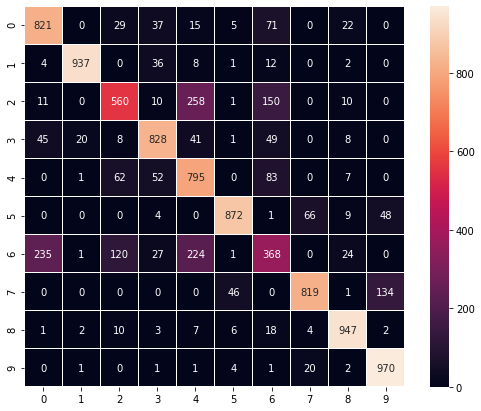

In [13]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
 
y_test = np.argmax(y_test, axis=1) 

confusion_matrix = tf.math.confusion_matrix(y_test, predictions)

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()


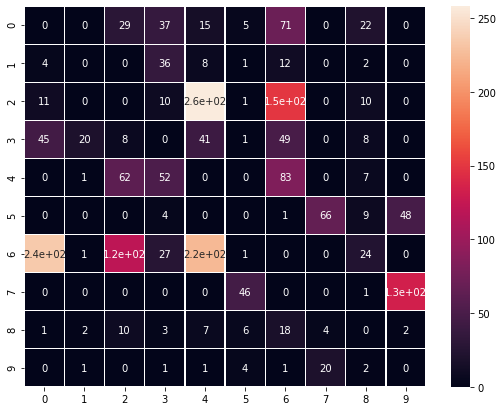

array([6, 3, 6, 4, 2, 7, 2, 5, 6, 7])

array([6, 3, 4, 6, 6, 7, 0, 9, 6, 7])

AttributeError: ignored

In [14]:
## I want to pick the largest value on the confusion matrix not on the diagonal
confusing_part_matrix= np.array(confusion_matrix)-np.identity(confusion_matrix.shape[0])*np.diag(confusion_matrix)

confusing_part_matrix = tf.convert_to_tensor(confusing_part_matrix)

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusing_part_matrix,
    annot=True,
    linewidths=.5
    #,fmt="d"
    #,square=True
    #,ax=ax
)
plt.show()


## find the max value of those remaining numbers
thisnumber=np.max(confusing_part_matrix)
x_thisnumber=np.argmax(confusing_part_matrix,axis=0)
y_thisnumber=np.argmax(confusing_part_matrix,axis=1)
z_thisnumber=np.argmax(confusing_part_matrix)
display(x_thisnumber,y_thisnumber)
#print("The worst the algorithm did is between " confus)
confusing_part_matrix.index[thisnumber]

In [ ]:
confusing_part_matrix[0]

In [ ]:
z_thisnumber=np.argmax(confusing_part_matrix)
z_thisnumber

In [ ]:

LABEL_NAMES = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

for i in range(10000):
  if (predictions[i]-y_test[i]==0):
  else:
    display("Prediction ", i, " is " + LABEL_NAMES[predictions[i]], "but it is ",  LABEL_NAMES[predictions[i])


In [ ]:
plt.imshow(x_test[0].reshape((28,28)), cmap=plt.cm.binary)
plt.show()